<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/Malware(Knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [0]:
data=pd.read_csv("Malware dataset.csv")
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
data=data.drop("hash",axis=1)

In [0]:
data.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
data.isnull().all()

millisecond          False
classification       False
state                False
usage_counter        False
prio                 False
static_prio          False
normal_prio          False
policy               False
vm_pgoff             False
vm_truncate_count    False
task_size            False
cached_hole_size     False
free_area_cache      False
mm_users             False
map_count            False
hiwater_rss          False
total_vm             False
shared_vm            False
exec_vm              False
reserved_vm          False
nr_ptes              False
end_data             False
last_interval        False
nvcsw                False
nivcsw               False
min_flt              False
maj_flt              False
fs_excl_counter      False
lock                 False
utime                False
stime                False
gtime                False
cgtime               False
signal_nvcsw         False
dtype: bool

In [0]:
data.isna().sum()

millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [0]:
data.columns

Index(['millisecond', 'classification', 'state', 'usage_counter', 'prio',
       'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count',
       'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users',
       'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm',
       'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nvcsw',
       'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'utime',
       'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [0]:
data.shape

(100000, 34)

In [0]:
data.classification.value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [0]:
data.classification=data.classification.map({"malware":1,"benign":0})

In [0]:
data.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
y=data["classification"]
x=data.drop("classification",axis=1)

In [0]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [0]:
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
x.shape
x=x.fillna(0)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
x.shape

(100000, 33)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
model.feature_importances_

array([0.00542714, 0.00160369, 0.        , 0.04568177, 0.17251403,
       0.        , 0.        , 0.        , 0.05460376, 0.        ,
       0.        , 0.03860508, 0.03537094, 0.03599305, 0.        ,
       0.02313499, 0.06047436, 0.06885915, 0.02651907, 0.        ,
       0.05785647, 0.03403049, 0.0808559 , 0.02826618, 0.00105962,
       0.04948162, 0.02632988, 0.        , 0.10212518, 0.02674293,
       0.0244647 , 0.        , 0.        ])

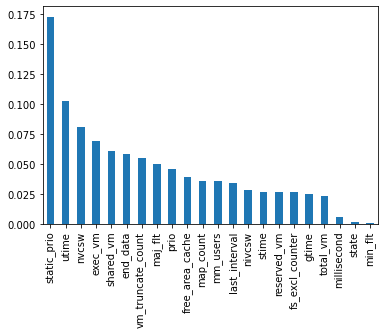

In [0]:
feature_int=pd.Series(model.feature_importances_,index=x.columns)
feature_int.nlargest(22).plot(kind="bar")

In [0]:
F=feature_int.nlargest(22)
F.head()
F.index
importemt=('static_prio', 'utime', 'nvcsw', 'end_data', 'vm_truncate_count',
       'maj_flt', 'exec_vm', 'shared_vm', 'prio', 'free_area_cache',
       'map_count', 'last_interval', 'mm_users', 'stime', 'nivcsw',
       'reserved_vm', 'fs_excl_counter', 'total_vm', 'gtime', 'millisecond',
       'state', 'min_flt')
      

In [0]:
for i in x.columns:
  if i in importemt:
    continue;
  else:
    print(i)   

usage_counter
normal_prio
policy
vm_pgoff
task_size
cached_hole_size
hiwater_rss
nr_ptes
lock
cgtime
signal_nvcsw


In [0]:
Final_Indep=x.drop(["usage_counter",
"normal_prio",
"policy",
"vm_pgoff",
"task_size",
"cached_hole_size",
"hiwater_rss",
"nr_ptes",
"lock",
"cgtime",
"signal_nvcsw"],axis=1)

In [0]:
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [0]:
Final_Indep.shape

(100000, 22)

In [0]:
Final_Indep.head(100)

,millisecond,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,shared_vm,exec_vm,reserved_vm,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
0,0,0,3069378560,14274,13173,24,724,6850,150,120,124,210,120,3473,341974,0,0,120,0,380690,4,0
1,1,0,3069378560,14274,13173,24,724,6850,150,120,124,210,120,3473,341974,0,0,120,0,380690,4,0
2,2,0,3069378560,14274,13173,24,724,6850,150,120,124,210,120,3473,341974,0,0,120,0,380690,4,0
3,3,0,3069378560,14274,13173,24,724,6850,150,120,124,210,120,3473,341974,0,0,120,0,380690,4,0
4,4,0,3069378560,14274,13173,24,724,6850,150,120,124,210,120,3473,341974,0,0,120,0,380690,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0,3069378560,14274,13173,34,724,6901,182,120,124,219,120,3473,341974,0,0,120,0,380690,4,0
96,96,0,3069378560,14274,13173,34,724,6901,182,120,124,219,120,3473,341974,0,0,120,0,380690,4,0
97,97,0,3069378560,14274,13173,34,724,6901,182,120,124,219,120,3473,341974,0,0,120,0,380690,4,0
98,98,0,3069378560,14274,13173,34,724,6901,182,120,124,219,120,3473,341974,0,0,120,0,380690,4,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [0]:
X_train , X_test , y_train , y_test = train_test_split(Final_Indep,y,random_state=0,test_size=0.2)

In [0]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
import math
math.sqrt(len(y_test))

141.4213562373095

In [0]:
classifier = KNeighborsClassifier(n_neighbors=141  , metric='euclidean')
# Fit Model
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=141, p=2,
                     weights='uniform')

In [0]:
# Predict The test set result
y_pred = classifier.predict(X_test)


In [0]:
cm = confusion_matrix(y_test,y_pred)
print (cm)

[[9950   73]
 [  71 9906]]


In [0]:
#from sklearn.model_selection import cross_val_score
#Knnclassifier=KNeighborsClassifier(n_neighbors=141)
#print(cross_val_score(Knnclassifier,Final_Indep,y,cv=1000,scoring="accuracy").mean())

In [0]:
# Taking User Input

V1 = float(input('millisecond : '))
V2 = float(input('state : '))
V3 = float(input('prio : '))
V4 = float(input('static_prio : '))
V5 = float(input('vm_truncate_count : '))
V6 = float(input('free_area_cache : '))
V7 = float(input('mm_users : '))
V8 = float(input('map_count : '))
V9 = float(input('total_vm : '))
V10 = float(input('shared_vm : '))
V11 = float(input('	exec_vm : '))
V12 = float(input('reserved_vm : '))
V13 = float(input('end_data : '))
V14 = float(input('last_interval : '))
V15 = float(input('nvcsw : '))
V16 = float(input('nivcsw : '))
V17 = float(input('min_flt : '))
V18 = float(input('maj_flt : '))
V19 = float(input('fs_excl_counter : '))
V20 = float(input('utime : '))
V21 = float(input('stime : '))
V22 = float(input('gtime : '))




# Convert UserInput into Dictionary 

inp={'V1':V1,'V2':V2,'V3':V3,'V4':V4,'V5':V5,'V6':V6,'V7':V7,
     'V8':V8,'V9':V9 ,'V10':V10,'V11':V11,
       'V12':V12,'V13':V13,'V14':V14,'V15':V15,'V16':V16,'V17':V17,
     'V18':V18,'V19':V19,'V20':V20,'V21':V21,
       'V22':V22
       }

# Converting Dictionary into DataFrame 

user_input=pd.DataFrame(inp,index=[0],columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22'
       ]) 

millisecond : 3
state : 0
prio : 3069378560
static_prio : 14274
vm_truncate_count : 13173
free_area_cache : 24
mm_users : 724
map_count : 6850
total_vm : 150
shared_vm : 120
	exec_vm : 124
reserved_vm : 210
end_data : 120
last_interval : 3473
nvcsw : 341974
nivcsw : 0
min_flt : 0
maj_flt : 120
fs_excl_counter : 0
utime : 380690
stime : 4
gtime : 0


In [0]:
pred = classifier.predict(user_input)
val = pred[0]
if val == 1:
  print ('malware')
else:
  print ('benign')

M
